We import all necessary modules.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

loading the dataset

In [ ]:
titanic1=pd.read_csv("titanic-passengers.csv",";")
titanic=titanic1.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


##<h2>**DATA EXPLORATION**</h2>

In [ ]:
titanic.shape

(891, 12)

there are 891 rows and 12 columns

In [ ]:
titanic.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 the data types of each column 

In [ ]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


for the columns age, cabin and embarked there are less data than the other columns 


Summary Statistics of the data

In [ ]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200



*  the average age of the passengers is 30 years old 

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##<h2>**DATA CLEANING**</h2>

In [ ]:
titanic.drop(['PassengerId','Cabin',"Embarked"],axis=1,inplace=True)
titanic=titanic.fillna(titanic[["Age"]].mean())
titanic.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

*  I deleted the columns that do not have an impact on the survival of the passengers 
*  I replaced the null values of the "Age" column by the average age 
*  now, all our data are modified, we have no more NAN values 

In [ ]:
encoder=LabelEncoder()
titanic['Survived']=encoder.fit_transform(titanic["Survived"])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000


we replaced the column "Survived" which was a string variable by a numeric variable to be able to use it during the modeling

##<h2>**DATA VISUALIZATION**</h2>

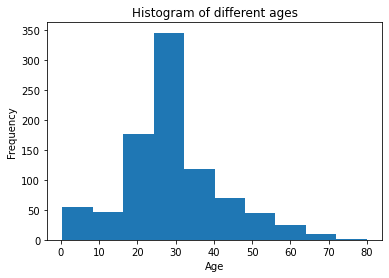

In [ ]:
plt.title("Histogram of different ages")
plt.xlabel("Age")
titanic["Age"].plot.hist()

 *Histograms Interpretation*

*  The age ranges from 0 to 80. 
*  Ages between 18 and 40 are quite frequent.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


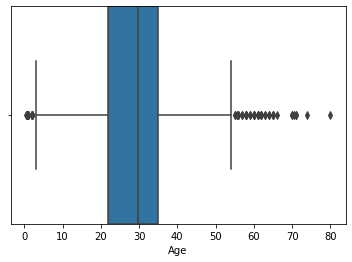

In [ ]:
sns.boxplot(titanic["Age"],width=1)

*Box plot Information*

*   ages above 55 and below 3 are considered outlier

*   Maximum=55

*   Minimum=3

*   Median=29

*   Q1=22

*   Q3=35

*   range=max-min= 55-3=52

*   Interquartile Range =Q3-Q1=35-22=13

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


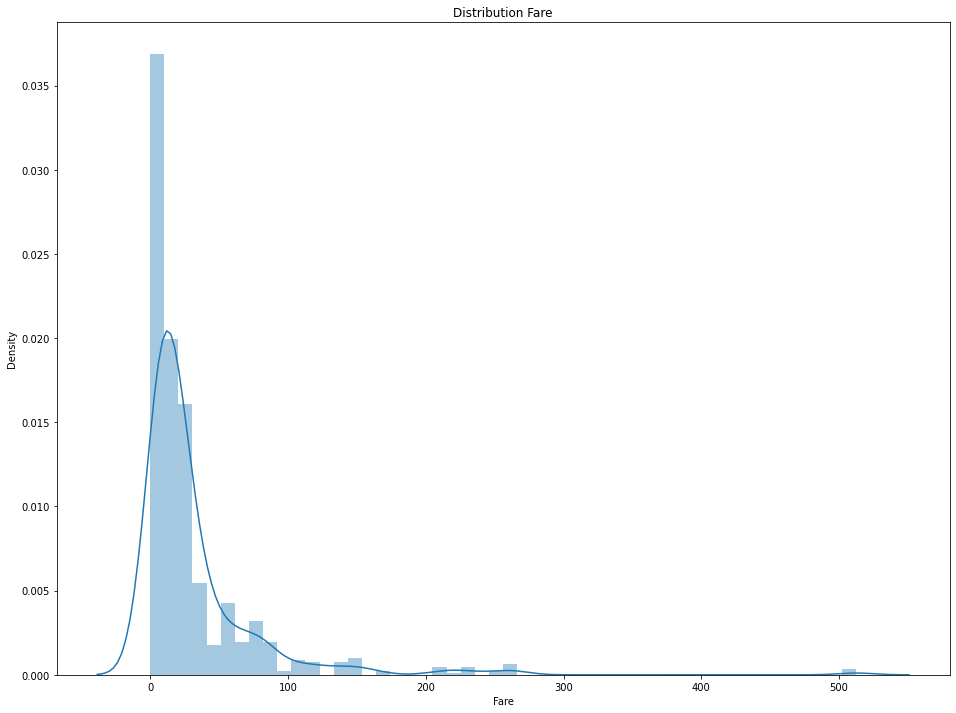

In [ ]:
plt.figure(figsize=(16,12))
sns.distplot(titanic['Fare'])
plt.title("Distribution Fare")
plt.show()

according to the graph, we notice that the majority of passengers paid very little (0_30) for their ticket with a few exceptions (500)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


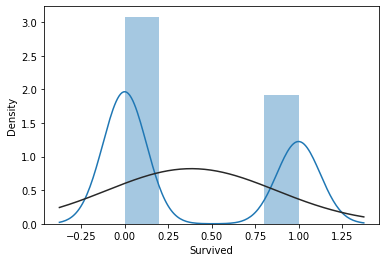

In [ ]:
sns.distplot(titanic["Survived"],fit=norm)

we notice that there are more dead than survivors

<BarContainer object of 891 artists>

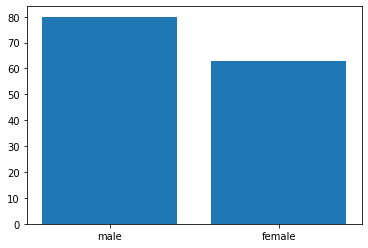

In [ ]:
plt.bar(titanic['Sex'],titanic['Age'])

there are more males than females among the passengers 

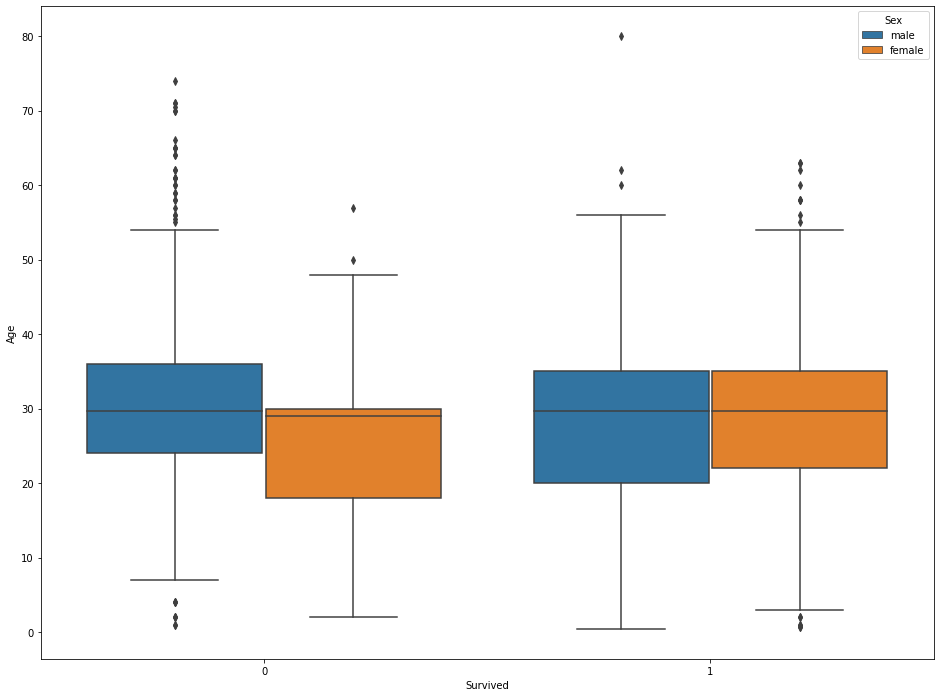

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(x='Survived',y='Age',data=titanic,hue='Sex')

*  survival rates for men and women are close

*  the average age of women and men who have survived is 30 years 

*  we notice that the mortality rate for women is lower than for men 

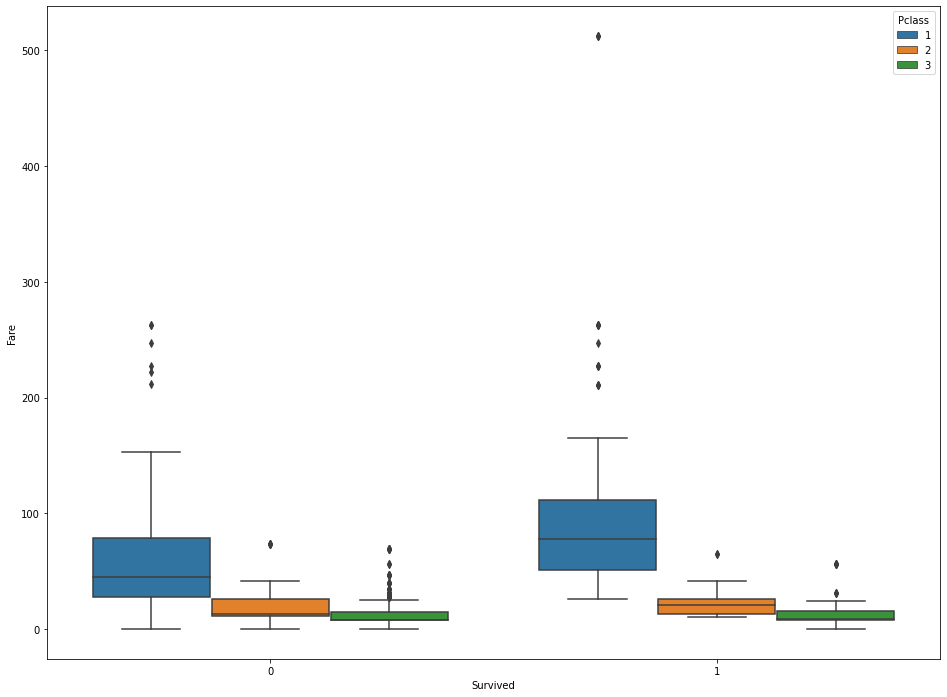

In [ ]:
plt.figure(figsize=(16,12))
sns.boxplot(x='Survived',y='Fare',data=titanic,hue='Pclass')

we will study the correlation between each feature

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

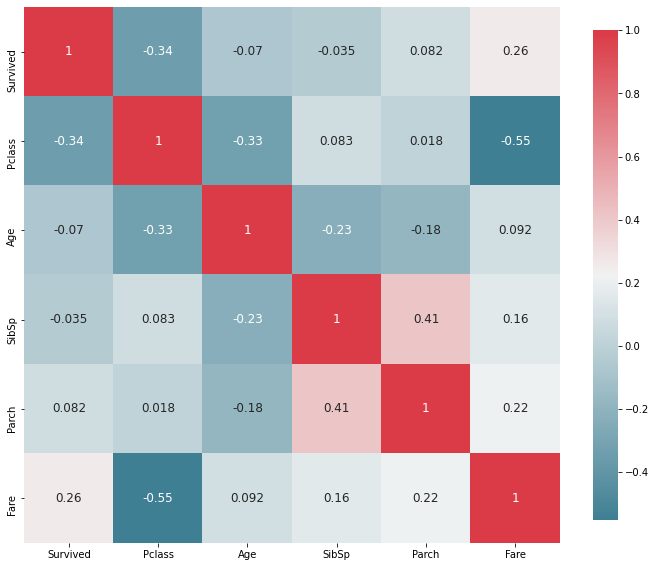

In [ ]:
plot_correlation_map( titanic )

This diagram gives us information about the correlation between each feature and label:

*  a strong negative correlation (-55%) between the class (pclass) and the price (fare) .if we increase the class, the price decreases

*  a negative correlation between "survived" and "pclass" (-34%) .if we increase the class the survival rate decreases

*  a positive correlation between the survival rate (survived) and the price (fare) of about 26% .when the price increases the survival rate increases

*  a positive correlation between parch and price .the presence of children and parents has a positive influence on the price

*  pclass and age (-33%) which means that if the age increases the price decreases


In [ ]:
titanic[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


##<h2>**FEATURE ENGINEERING**</h2>

In [ ]:
l = [name[name.find(',')+2: name.find('.')] for name in titanic['Name']]
titanic2=titanic
titanic2['title']=pd.DataFrame(l)
titanic2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,Mr
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,Mr


we have created a new column "title" in order to delete the column "name" to categorize the passengers 

In [ ]:
titanic2['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Jonkheer          1
Capt              1
Mme               1
Lady              1
Sir               1
Ms                1
the Countess      1
Don               1
Name: title, dtype: int64

In [ ]:
titanic.drop(['Name','Ticket'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title
0,0,2,male,28.0,0,0,13.0000,Mr
1,0,3,male,25.0,0,0,7.6500,Mr
2,0,3,male,20.0,0,0,7.8542,Mr
3,0,3,female,29.0,0,4,21.0750,Mrs
4,0,1,male,31.0,1,0,52.0000,Mr


I deleted the column "Name" and "Ticket" because these columns have no impact on the survival of passengers 

In [ ]:
pd.crosstab(titanic["title"],titanic["Sex"])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [ ]:
pd.crosstab(titanic["title"],titanic["Pclass"])

Pclass,1,2,3
title,,,
Capt,1,0,0
Col,2,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28
Miss,46,34,102


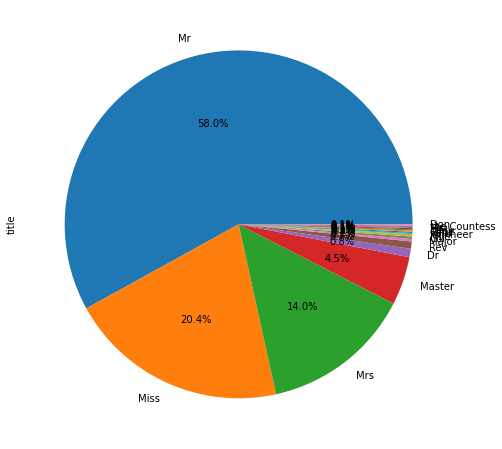

In [ ]:
plt.figure(figsize=(12,8))
titanic['title'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

the diagram is not very representative 


As you should've seen, there is a lot of titles which makes the feature not very practical, let's try to group these titles into more useful ones

In [ ]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [ ]:
titanic['Statut'] = titanic['title'].map(Title_Dictionary,titanic["title"]) 
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,title,Statut
0,0,2,male,28.0,0,0,13.0000,Mr,Mrs
1,0,3,male,25.0,0,0,7.6500,Mr,Mrs
2,0,3,male,20.0,0,0,7.8542,Mr,Mrs
3,0,3,female,29.0,0,4,21.0750,Mrs,Mrs
4,0,1,male,31.0,1,0,52.0000,Mr,Mrs


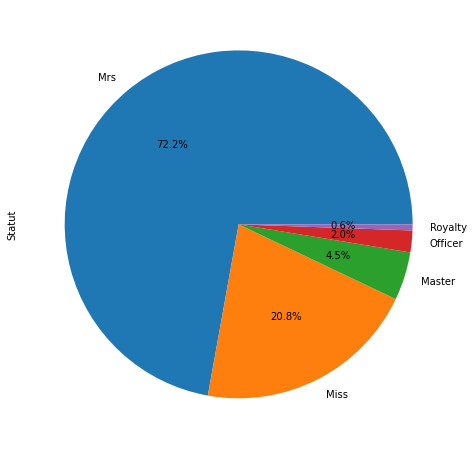

In [ ]:
plt.figure(figsize=(12,8))
titanic['Statut'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

here the data are more representative because there are fewer categories so interpretation is easier 

create another column "familysize" or add two columns "Parch" and "Sibsp 

In [ ]:
titanic["FamilySize"]=titanic['Parch'] +titanic['SibSp']
titanic.drop(["SibSp","Parch"],axis=1,inplace=True)
                         
titanic.head()

,Survived,Pclass,Sex,Age,Fare,title,Statut,FamilySize
0,0,2,male,28.0,13.0000,Mr,Mrs,0
1,0,3,male,25.0,7.6500,Mr,Mrs,0
2,0,3,male,20.0,7.8542,Mr,Mrs,0
3,0,3,female,29.0,21.0750,Mrs,Mrs,4
4,0,1,male,31.0,52.0000,Mr,Mrs,1


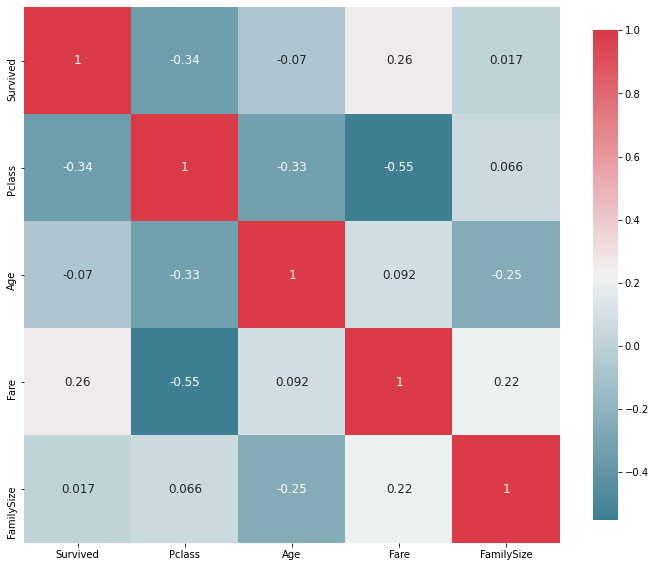

In [ ]:
plot_correlation_map( titanic )

finally, I choose to delete the columns "FamilySize" and "title" because they have direct impact with the survival of passengers 

In [ ]:
titanic.drop(["FamilySize","title"],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Statut
0,0,2,male,28.0,13.0000,Mrs
1,0,3,male,25.0,7.6500,Mrs
2,0,3,male,20.0,7.8542,Mrs
3,0,3,female,29.0,21.0750,Mrs
4,0,1,male,31.0,52.0000,Mrs


##<h2>**DATA PREPROCESSING**</h2>

we will replace all string values by numerical values to be able to use them in the modeling 

In [ ]:
one_hot=pd.get_dummies(titanic["Statut"])
titanic_final=titanic.join(one_hot)
titanic_final.head()

,Survived,Pclass,Sex,Age,Fare,Statut,Master,Miss,Mrs,Officer,Royalty
0,0,2,male,28.0,13.0000,Mrs,0,0,1,0,0
1,0,3,male,25.0,7.6500,Mrs,0,0,1,0,0
2,0,3,male,20.0,7.8542,Mrs,0,0,1,0,0
3,0,3,female,29.0,21.0750,Mrs,0,0,1,0,0
4,0,1,male,31.0,52.0000,Mrs,0,0,1,0,0


In [ ]:
encoder=LabelEncoder()
titanic_final["Sex"]=encoder.fit_transform(titanic_final["Sex"])
titanic_final.head()

,Survived,Pclass,Sex,Age,Fare,Statut,Master,Miss,Mrs,Officer,Royalty
0,0,2,1,28.0,13.0000,Mrs,0,0,1,0,0
1,0,3,1,25.0,7.6500,Mrs,0,0,1,0,0
2,0,3,1,20.0,7.8542,Mrs,0,0,1,0,0
3,0,3,0,29.0,21.0750,Mrs,0,0,1,0,0
4,0,1,1,31.0,52.0000,Mrs,0,0,1,0,0


In [ ]:
titanic_final.drop("Statut",axis=1,inplace=True)
titanic_final.head()

,Survived,Pclass,Sex,Age,Fare,Master,Miss,Mrs,Officer,Royalty
0,0,2,1,28.0,13.0000,0,0,1,0,0
1,0,3,1,25.0,7.6500,0,0,1,0,0
2,0,3,1,20.0,7.8542,0,0,1,0,0
3,0,3,0,29.0,21.0750,0,0,1,0,0
4,0,1,1,31.0,52.0000,0,0,1,0,0


##<h2>**MACHINE LEARNING**</h2>

feature selection

In [ ]:
x = titanic_final[['Pclass', 'Sex','Age','Fare']]
y= titanic_final['Survived']

Split the dataset into a training set and a testing set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

logistic regression

In [ ]:
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   

 validation  confusion matrix

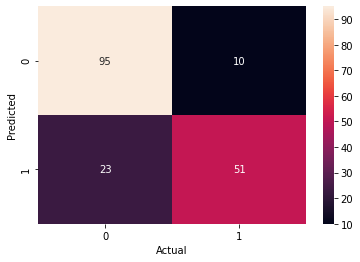

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

* True Positive (TP) = 95; meaning 95 positive class data points were correctly classified by the model

* True Negative (TN) = 51; meaning 51 negative class data points were correctly classified by the model

* False Positive (FP) = 10; meaning 10 negative class data points were incorrectly classified as belonging to the positive class by the model

* False Negative (FN) = 23; meaning 23 positive class data points were incorrectly classified as belonging to the negative class by the model

This turned out to be a pretty decent classifier for our dataset considering the relatively larger number of true positive and true negative values.

In [ ]:
def accuracy(TP,TN,FP,FN):
  accur=(TP+TN)/(TP+TN+FP+FN)
  return accur
x=accuracy(95,51,10,23)
print("Accuracy=",x)

Accuracy= 0.8156424581005587


Our model says "I can predict live passengers 96% of the time". However, it does the opposite. It predicts the passengers who will not be alive with 96% accuracy

In [ ]:
def precision(TP,FP):
  prec=TP/(TP+FP)
  return prec
y=precision(95,10)
print("Precision=",y)

Precision= 0.9047619047619048


90% of correctly predicted cases were found to be positive 

In [ ]:
def recall(TP,FN):
  rec=TP/(TP+FN)
  return rec
z=recall(95,23)
print("Recall=",z)

Recall= 0.8050847457627118


80% of real positive cases we could predict correctly with our model 

In [ ]:
def F1_score(y,z):
  f1_score=2/((1/z)+(1/y))
  return f1_score
print("F1_score=",F1_score(y,z))

F1_score= 0.8520179372197311


F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall

 validation matrix for classification : ROC / AUC

In [ ]:
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.796975546975547
